In [951]:
# Importing requiered Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [952]:
#Importing the dataset

df = pd.read_csv('day.csv')

# Taking copy of the original dataset for any future reference
DF = df.copy()

### Data Exploration

In [953]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [955]:
df.shape

(730, 16)

In [956]:
# Categorical counts and values of the Categorical Variables

print(df['season'].value_counts())
print(df['yr'].value_counts())
print(df['mnth'].value_counts())
print(df['holiday'].value_counts())
print(df['weekday'].value_counts())
print(df['workingday'].value_counts())
print(df['weathersit'].value_counts())
print(df['weathersit'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [957]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [958]:
# As the cnt column is sum of casual and registered, lets find the ratio.

casual_percent = sum(df['casual'])/sum(df['cnt']) * 100
registered_percent = sum(df['registered'])/sum(df['cnt'])* 100
print(casual_percent)
print(registered_percent)


18.838687328026694
81.1613126719733


Approximately 18.84% of the total users are casual ones and 81.16% of the total users are registered users.
Usage of registered users is more.

In [959]:
# Dropping 'casual' and 'registered' columns as both are the sum of target variable.
# Dropping 'instant' columns as it is index.
# Dropping 'dteday' as we have month, week,yr, month for analyzation.

df = df.drop(['instant','dteday','casual','registered'],axis=1)

In [960]:
#Encoding the categorical variables to String values.

df.season = df.season.map({1:'Spring' , 2:'Summer', 3:'Fall' , 4:'Winter'})

df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow_Rain',4:'Heavy_snow_rain'})

In [961]:
df.shape

(730, 12)

In [962]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualisation

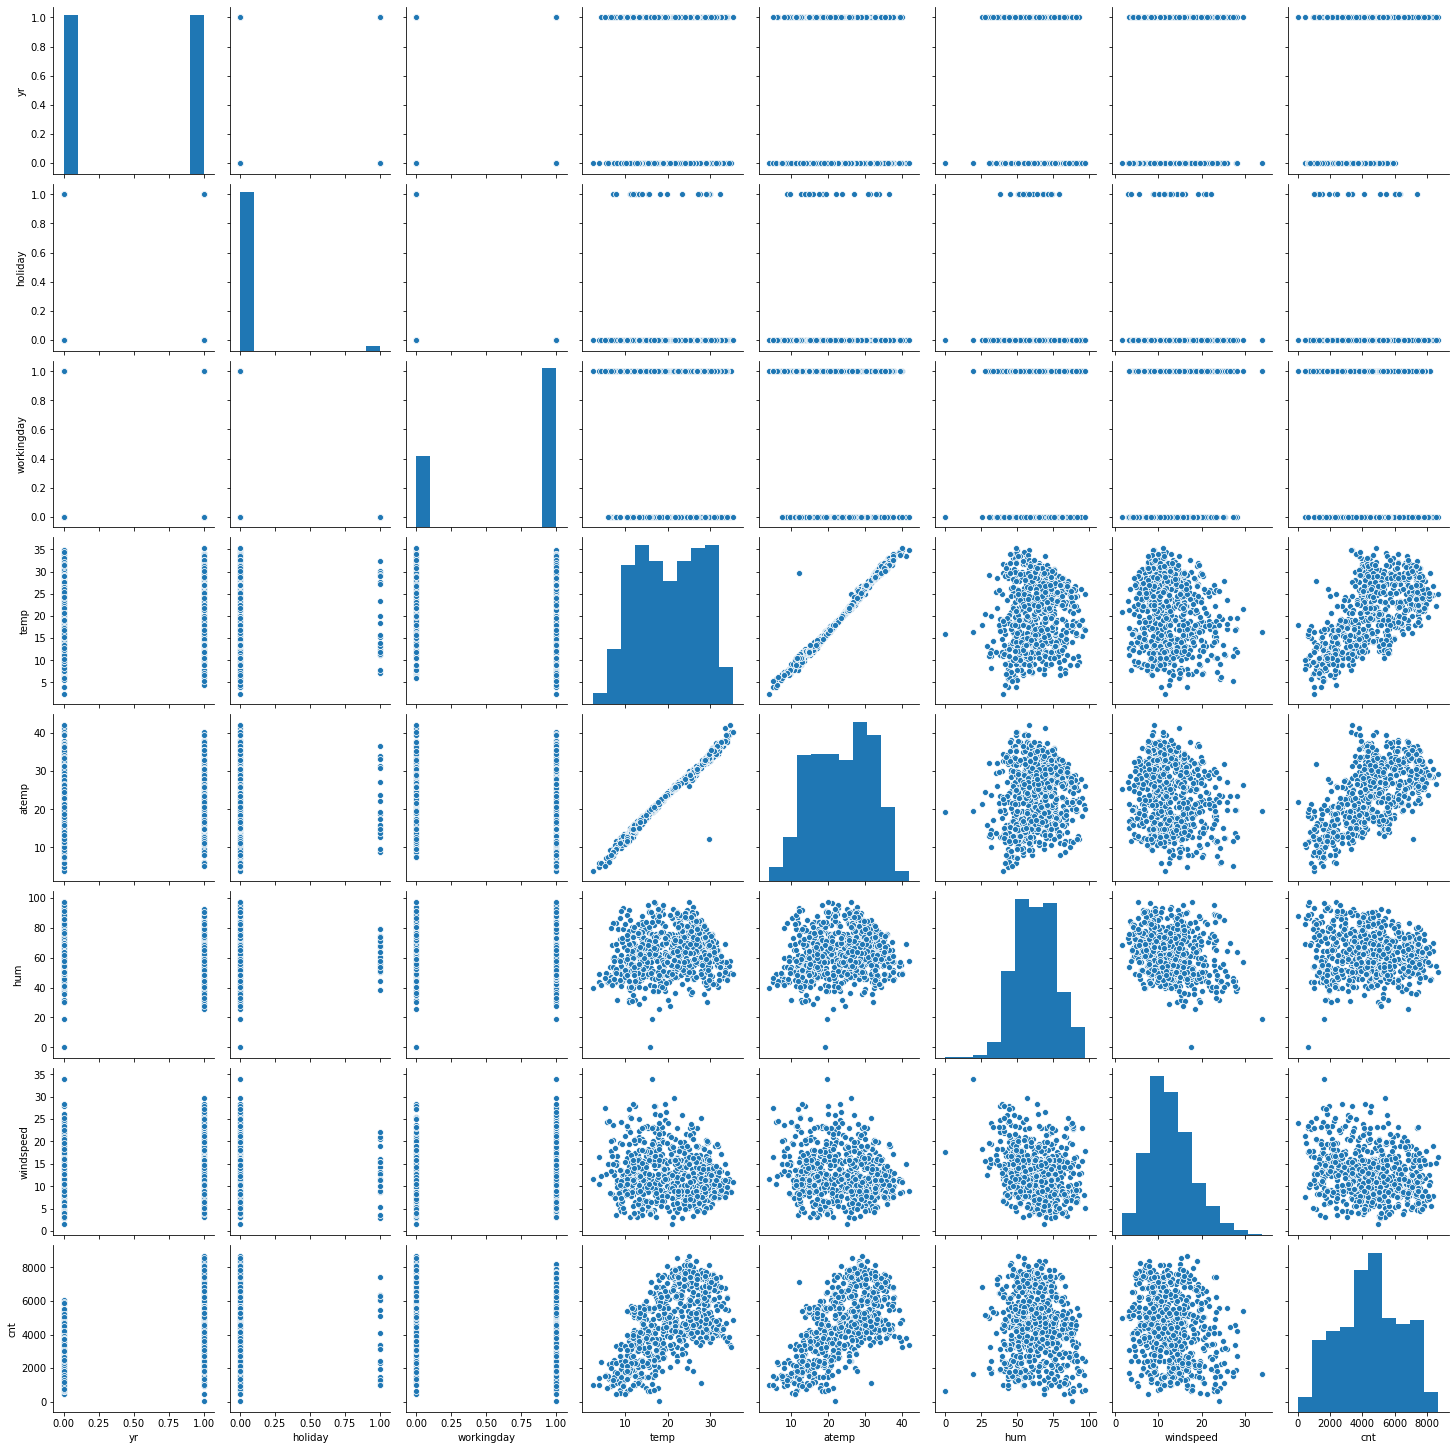

In [963]:
sns.pairplot(df)

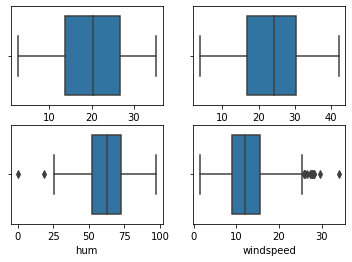

In [964]:
plt.subplot(221)
sns.boxplot(df['temp'])

plt.subplot(222)
sns.boxplot(df['atemp'])


plt.subplot(223)
sns.boxplot(df['hum'])

plt.subplot(224)
sns.boxplot(df['windspeed'])

plt.show()

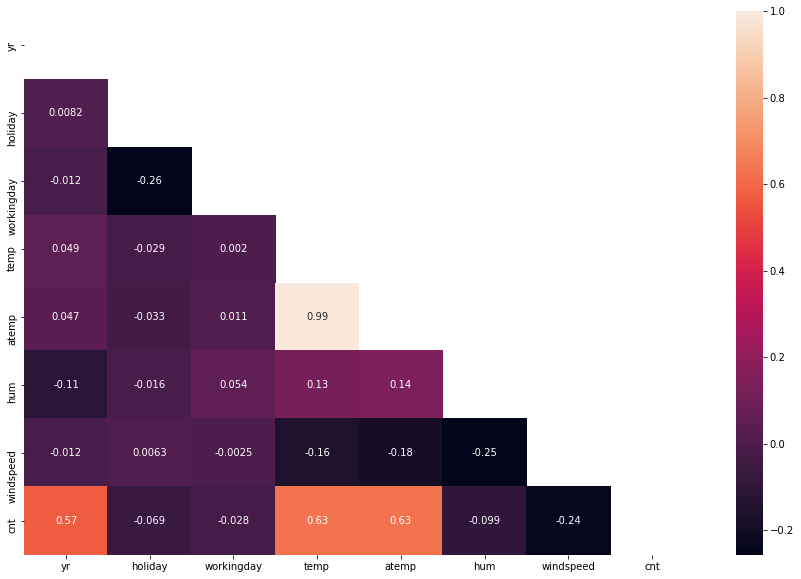

In [965]:
plt.figure(figsize=(15,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix)

Higly Correlated
1. temp/atemp and cnt
2. year and cnt


Significance correlation
1. season and cnt
2. month and cnt


Multicollinearity
1. There is 99% multicollinearity between temp and atemp.
2. 83% of multicollinearity between season and month.
3. 59% of multicollinearity between humidity and weathersit.


There is significant multicollinearity btw hum & mnth, temp/atemp & mnth, season & hum,season & temp/atemp.

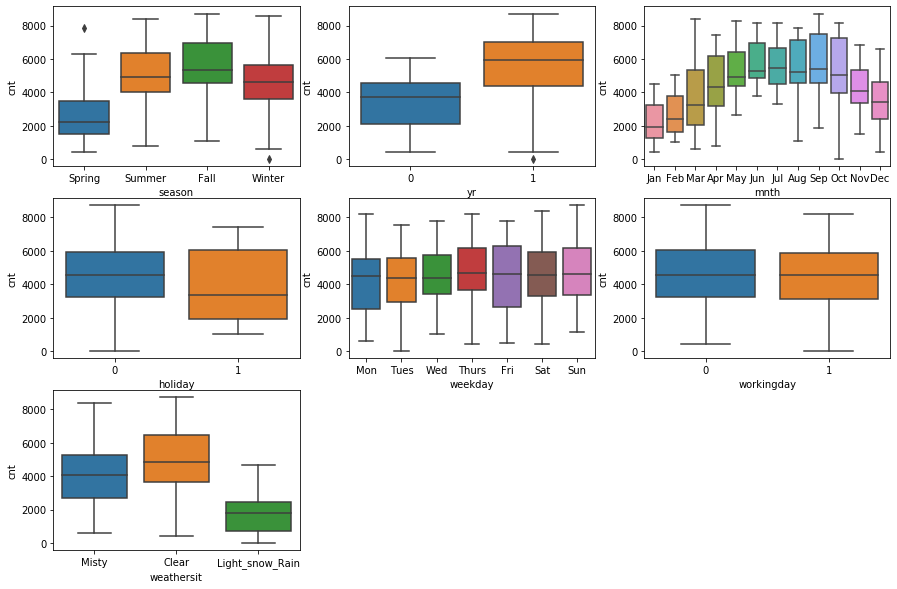

In [966]:
## Visualisation of categorical variables 

plt.figure(figsize=(15,10))

plt.subplot(331)
sns.boxplot(data=df,x='season',y='cnt')

plt.subplot(332)
sns.boxplot(data=df,x='yr',y='cnt')

plt.subplot(333)
sns.boxplot(data=df,x='mnth',y='cnt')

plt.subplot(334)
sns.boxplot(data=df,x='holiday',y='cnt')


plt.subplot(335)
sns.boxplot(data=df,x='weekday',y='cnt')

plt.subplot(336)
sns.boxplot(data=df,x='workingday',y='cnt')


plt.subplot(337)
sns.boxplot(data=df,x='weathersit',y='cnt')


1. Highest number of bikes are rented during 'fall' and 'summer' season.
2. More bikes are rented during the year 2019 than 2018.
3. Bikes rental are increasing continously from January till June.
4. The highest number of bikes are rented during 'september' month.
5. Less number of bikes are rented during holiday.
6. There is no much difference in bike rentals during workingday and weekend.
7. More number of bikes are rented when the sky is clear.

In [967]:
## Mini Statistical Report

df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Handling Categorical variables

In [968]:
#df = pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first=True)
df_season = pd.get_dummies(df['season'],drop_first=True)

df_mnth = pd.get_dummies(df['mnth'],drop_first=True)

df_weekday = pd.get_dummies(df['weekday'],drop_first=True)

df_weathersit = pd.get_dummies(df['weathersit'],drop_first=True)

df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [969]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [970]:
df_new = pd.concat([df,df_season,df_mnth,df_weekday,df_weathersit],axis=1)
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Light_snow_Rain', 'Misty'],
      dtype='object')

In [971]:
df_new = df_new.drop(['season','weekday','mnth','weathersit'],axis=1)

In [972]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snow_Rain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


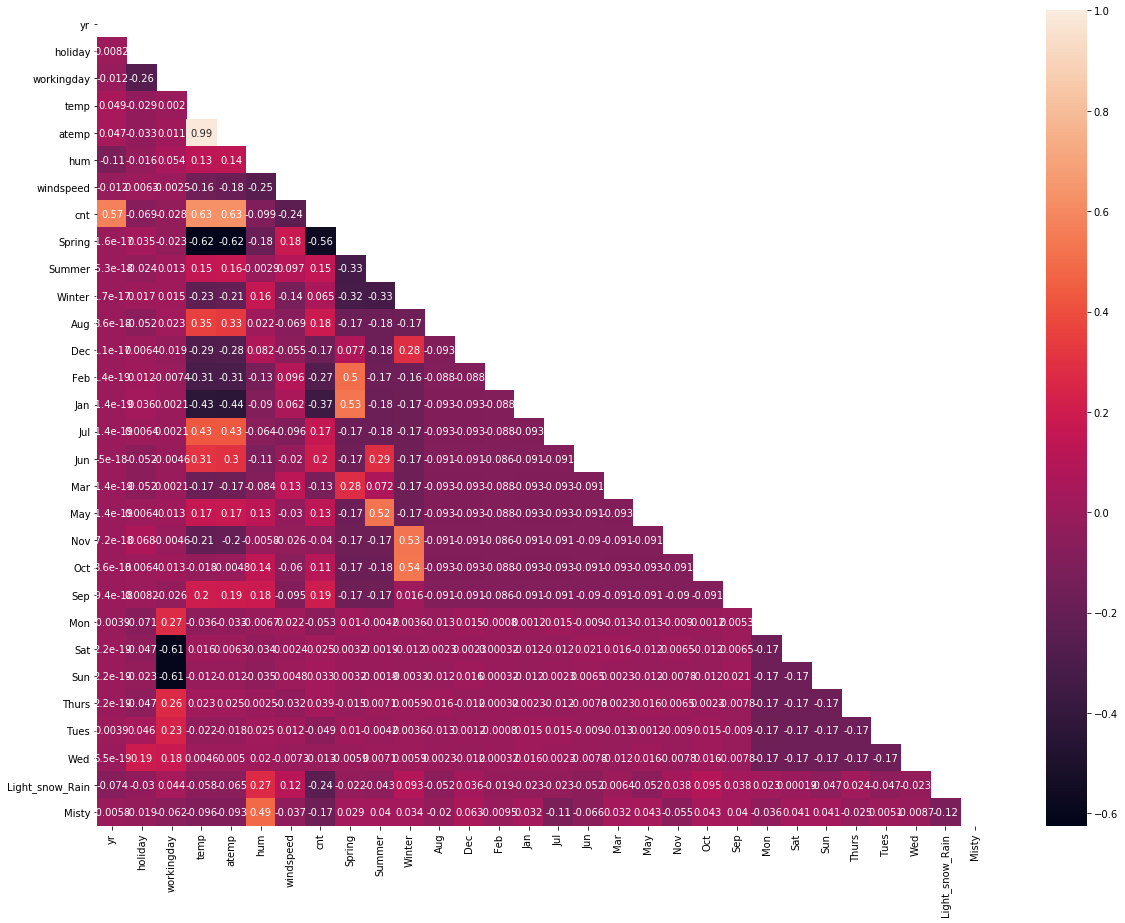

In [973]:
plt.figure(figsize=(20,15))
matrix = np.triu(df_new.corr())

sns.heatmap(df_new.corr(),annot=True,mask=matrix)

### Train Test split

In [974]:
df_train,df_test = train_test_split(df_new,test_size=0.3,random_state=111)

In [975]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snow_Rain,Misty
335,0,0,0,12.880847,16.57165,62.5833,6.750518,3940,0,0,...,0,0,0,0,1,0,0,0,0,0
614,1,0,0,28.836653,32.86020,73.6250,11.500282,7504,0,0,...,0,1,0,1,0,0,0,0,0,0
117,0,0,0,25.317500,28.94645,70.0833,21.500836,4058,0,1,...,0,0,0,1,0,0,0,0,0,1
439,1,0,0,17.869153,21.81145,84.2083,7.583864,4378,1,0,...,0,0,0,1,0,0,0,0,0,1
303,0,0,1,13.940000,17.80315,70.3333,7.125450,3669,0,0,...,1,0,0,0,0,0,0,1,0,0


In [976]:
df_train.shape

(511, 30)

In [977]:
df_test.shape

(219, 30)

In [978]:
### Feature Scaling by Standardization
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()

In [979]:
var_scale = ['temp','atemp','hum','windspeed','cnt']
df_train[var_scale] =s.fit_transform(df_train[var_scale])

In [980]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snow_Rain,Misty
335,0,0,0,0.317788,0.331261,0.517401,0.195963,0.431230,0,0,...,0,0,0,0,1,0,0,0,0,0
614,1,0,0,0.802708,0.758879,0.671114,0.373245,0.870471,0,0,...,0,1,0,1,0,0,0,0,0,0
117,0,0,0,0.695756,0.656133,0.621809,0.746509,0.445773,0,1,...,0,0,0,1,0,0,0,0,0,1
439,1,0,0,0.469390,0.468820,0.818445,0.227067,0.485211,1,0,...,0,0,0,1,0,0,0,0,0,1
303,0,0,1,0.349977,0.363591,0.625289,0.209957,0.397831,0,0,...,1,0,0,0,0,0,0,1,0,0


##### MSR

In [981]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snow_Rain,Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.477495,0.023483,0.694716,0.549974,0.526011,0.524963,0.415155,0.501350,0.234834,0.256360,...,0.095890,0.082192,0.158513,0.146771,0.136986,0.135029,0.135029,0.138943,0.023483,0.330724
std,0.499983,0.151581,0.460979,0.226071,0.211410,0.192331,0.189788,0.231626,0.424310,0.437051,...,0.294729,0.274926,0.365579,0.354224,0.344170,0.342090,0.342090,0.346226,0.151581,0.470935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351016,0.340092,0.376160,0.277597,0.343296,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.545046,0.529003,0.390342,0.506162,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.699215,0.666183,0.526892,0.673466,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation

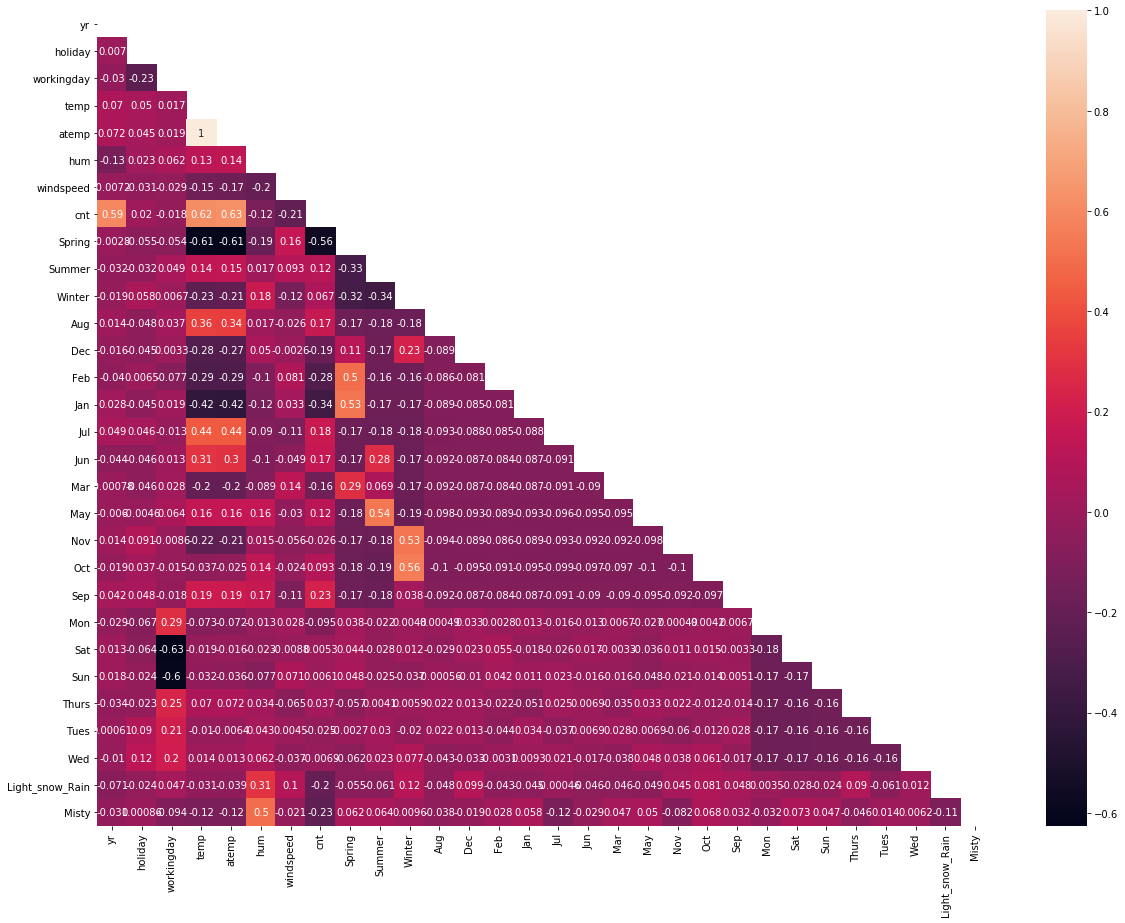

In [982]:
plt.figure(figsize=(20,15))
upper_tri = np.triu(df_train.corr()) # upper triangle

sns.heatmap(df_train.corr(),annot=True,mask=upper_tri)

In [983]:
# Splitting of X and y axis

X_train = df_train.drop('cnt',axis=1)
y_train = df_train['cnt']

In [984]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_snow_Rain,Misty
335,0,0,0,0.317788,0.331261,0.517401,0.195963,0,0,1,...,0,0,0,0,1,0,0,0,0,0
614,1,0,0,0.802708,0.758879,0.671114,0.373245,0,0,0,...,0,1,0,1,0,0,0,0,0,0
117,0,0,0,0.695756,0.656133,0.621809,0.746509,0,1,0,...,0,0,0,1,0,0,0,0,0,1
439,1,0,0,0.469390,0.468820,0.818445,0.227067,1,0,0,...,0,0,0,1,0,0,0,0,0,1
303,0,0,1,0.349977,0.363591,0.625289,0.209957,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [985]:
y_train.head()

335    0.431230
614    0.870471
117    0.445773
439    0.485211
303    0.397831
Name: cnt, dtype: float64

# Model Building

##### As the model has more number of features, feature selection will be implemented by using Recursive Feature Elimination.

### Model Building using Recursive Feature Elimination

In [986]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [987]:
from sklearn.feature_selection import RFE

rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [988]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 15),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 10),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 12),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 2),
 ('Sun', True, 1),
 ('Thurs', False, 14),
 ('Tues', False, 7),
 ('Wed', False, 8),
 ('Light_snow_Rain', True, 1),
 ('Misty', True, 1)]

In [989]:
# Extracting the rfe support columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep', 'Sun', 'Light_snow_Rain', 'Misty'],
      dtype='object')

In [990]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May',
       'Oct', 'Mon', 'Sat', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

### Building model using statsmodels for detailed statistic approach

### Model 1

In [991]:
X_train_RFE = X_train[col]
X_train_lm1 = sm.add_constant(X_train_RFE)

In [992]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.16e-195
Time:                        20:31:49   Log-Likelihood:                 513.40
No. Observations:                 511   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -927.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3134      0.028     11.185      0.000       0.258       0.369
yr                  0.2499      0.008     30.659      0.000       0.234       0.266
temp               -0.1638      0.226     -0.726      0.468      -0.607       0.280
atemp               0.6318      0.243      2.604      0.009       0.155       1.108
hum                -0.1409      0.030     -4.631      0.000      -0.201      -0.081
windspeed          -0.1167      0.023     -5.012      0.000      -0.162      -0.071
Spring             -0.1358      0.015     -8.763      0.000      -0.166      -0.105
Winter              0.0740      0.013      5.530      0.000       0.048       0.100
Dec                -0.0562      0.017     -3.269      0.001      -0.090      -0.022
Jan                -0.0421      0.018     -2.285      0.023      -0.078      -0.006
Jul                -0.0792      0.017     -4.711      0.000      -0.112      -0.046
Nov                -0.0669      0.018     -3.659      0.000      -0.103      -0.031
Sep                 0.0624      0.016      4.020      0.000       0.032       0.093
Sun                 0.0198      0.012      1.691      0.091      -0.003       0.043
Light_snow_Rain    -0.2051      0.031     -6.675      0.000      -0.266      -0.145
Misty              -0.0638      0.011     -5.720      0.000      -0.086      -0.042
==============================================================================
Omnibus:                      117.036   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.663
Skew:                          -1.117   Prob(JB):                     1.73e-69
Kurtosis:                       6.144   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor

In [993]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [994]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values,i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
3,atemp,165.57
2,temp,163.84
0,const,49.53
6,Spring,2.72
4,hum,2.16
7,Winter,2.14
15,Misty,1.73
11,Nov,1.66
9,Jan,1.55
10,Jul,1.37


In [995]:
# Dropping temp as it has high p value which is not significant
X_train_lm2 = X_train_lm1.drop('temp',axis=1)

### Model2

In [996]:
lm.fit(X_train_lm2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [997]:
X_train_lm2 = sm.add_constant(X_train_lm2)
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [998]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     206.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.81e-196
Time:                        20:31:55   Log-Likelihood:                 513.13
No. Observations:                 511   AIC:                            -996.3
Df Residuals:                     496   BIC:                            -932.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3149      0.028     11.270      0.000       0.260       0.370
yr                  0.2501      0.008     30.716      0.000       0.234       0.266
atemp               0.4576      0.035     13.033      0.000       0.389       0.527
hum                -0.1376      0.030     -4.576      0.000      -0.197      -0.079
windspeed          -0.1207      0.023     -5.332      0.000      -0.165      -0.076
Spring             -0.1351      0.015     -8.739      0.000      -0.166      -0.105
Winter              0.0753      0.013      5.676      0.000       0.049       0.101
Dec                -0.0562      0.017     -3.269      0.001      -0.090      -0.022
Jan                -0.0427      0.018     -2.322      0.021      -0.079      -0.007
Jul                -0.0797      0.017     -4.745      0.000      -0.113      -0.047
Nov                -0.0670      0.018     -3.664      0.000      -0.103      -0.031
Sep                 0.0609      0.015      3.960      0.000       0.031       0.091
Sun                 0.0197      0.012      1.687      0.092      -0.003       0.043
Light_snow_Rain    -0.2082      0.030     -6.840      0.000      -0.268      -0.148
Misty              -0.0646      0.011     -5.827      0.000      -0.086      -0.043
==============================================================================
Omnibus:                      116.891   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.053
Skew:                          -1.116   Prob(JB):                     2.34e-69
Kurtosis:                       6.141   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [999]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values,i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,49.28
2,atemp,3.47
5,Spring,2.71
3,hum,2.11
6,Winter,2.10
14,Misty,1.72
10,Nov,1.66
8,Jan,1.54
9,Jul,1.37
7,Dec,1.34


### Model 3

In [1000]:
X_train_lm3 = X_train_lm2.drop('Sun',axis=1)

In [1001]:
lm.fit(X_train_lm3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1002]:
X_train_lm3 = sm.add_constant(X_train_lm3)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     220.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          7.60e-197
Time:                        20:31:59   Log-Likelihood:                 511.67
No. Observations:                 511   AIC:                            -995.3
Df Residuals:                     497   BIC:                            -936.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3189      0.028     11.433      0.000       0.264       0.374
yr                  0.2502      0.008     30.669      0.000       0.234       0.266
atemp               0.4569      0.035     12.991      0.000       0.388       0.526
hum                -0.1422      0.030     -4.739      0.000      -0.201      -0.083
windspeed          -0.1190      0.023     -5.255      0.000      -0.164      -0.075
Spring             -0.1348      0.015     -8.700      0.000      -0.165      -0.104
Winter              0.0752      0.013      5.661      0.000       0.049       0.101
Dec                -0.0563      0.017     -3.273      0.001      -0.090      -0.023
Jan                -0.0434      0.018     -2.357      0.019      -0.080      -0.007
Jul                -0.0787      0.017     -4.677      0.000      -0.112      -0.046
Nov                -0.0670      0.018     -3.660      0.000      -0.103      -0.031
Sep                 0.0618      0.015      4.012      0.000       0.032       0.092
Light_snow_Rain    -0.2071      0.030     -6.795      0.000      -0.267      -0.147
Misty              -0.0629      0.011     -5.688      0.000      -0.085      -0.041
==============================================================================
Omnibus:                      111.212   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.133
Skew:                          -1.073   Prob(JB):                     3.66e-64
Kurtosis:                       6.019   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1003]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values,i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,48.92
2,atemp,3.47
5,Spring,2.71
6,Winter,2.10
3,hum,2.09
13,Misty,1.70
10,Nov,1.66
8,Jan,1.54
9,Jul,1.37
7,Dec,1.34


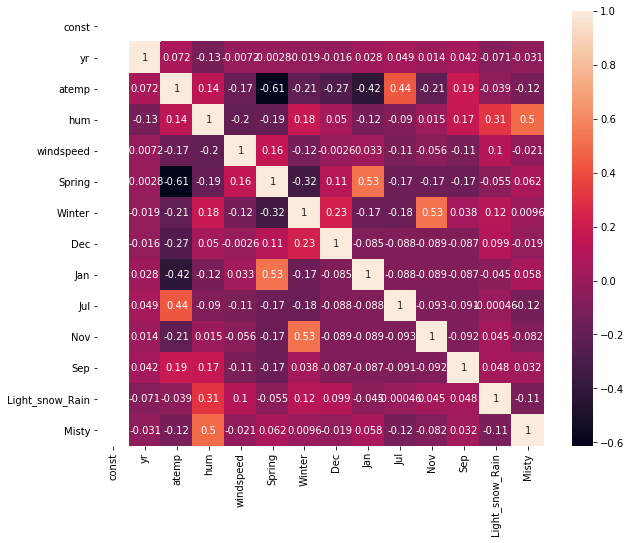

In [1004]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train_lm3.corr(),annot=True)

As we could see many multicollinearities, dropping the highest coefficient which is 'Jan'

### Model 4

In [1005]:
X_train_lm4 = X_train_lm3.drop('Jan',axis=1)

In [1006]:
lm.fit(X_train_lm4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1007]:
X_train_lm4 = sm.add_constant(X_train_lm4)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     236.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          7.57e-197
Time:                        20:32:04   Log-Likelihood:                 508.83
No. Observations:                 511   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -936.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3046      0.027     11.137      0.000       0.251       0.358
yr                  0.2490      0.008     30.443      0.000       0.233       0.265
atemp               0.4778      0.034     13.973      0.000       0.411       0.545
hum                -0.1437      0.030     -4.768      0.000      -0.203      -0.084
windspeed          -0.1141      0.023     -5.034      0.000      -0.159      -0.070
Spring             -0.1436      0.015     -9.517      0.000      -0.173      -0.114
Winter              0.0760      0.013      5.697      0.000       0.050       0.102
Dec                -0.0467      0.017     -2.780      0.006      -0.080      -0.014
Jul                -0.0822      0.017     -4.881      0.000      -0.115      -0.049
Nov                -0.0621      0.018     -3.398      0.001      -0.098      -0.026
Sep                 0.0617      0.015      3.990      0.000       0.031       0.092
Light_snow_Rain    -0.2064      0.031     -6.741      0.000      -0.267      -0.146
Misty              -0.0623      0.011     -5.614      0.000      -0.084      -0.041
==============================================================================
Omnibus:                      106.999   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.201
Skew:                          -1.049   Prob(JB):                     3.50e-59
Kurtosis:                       5.870   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1008]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4.values,i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,46.61
2,atemp,3.25
5,Spring,2.55
6,Winter,2.10
3,hum,2.09
12,Misty,1.70
9,Nov,1.64
8,Jul,1.36
11,Light_snow_Rain,1.34
7,Dec,1.27


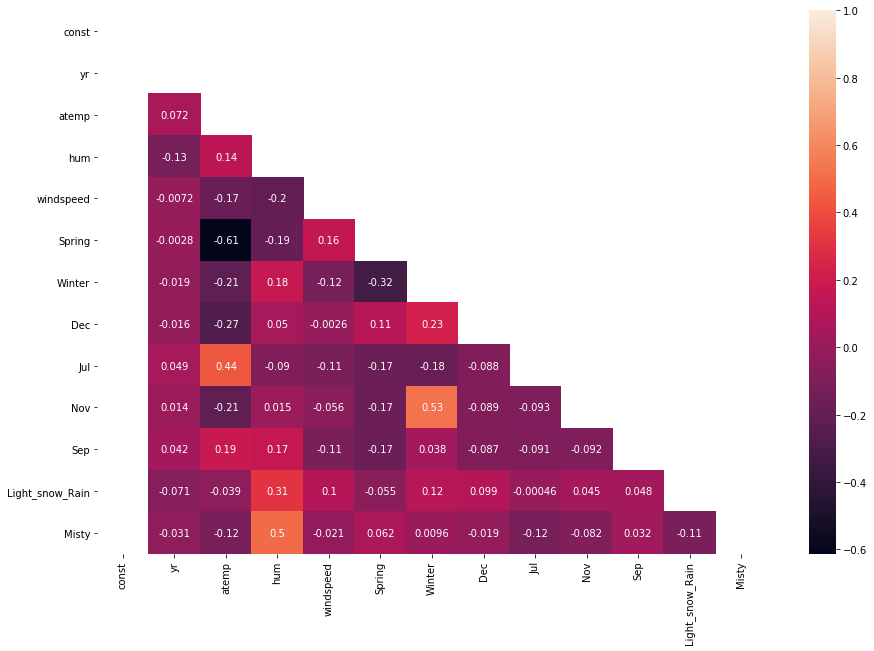

In [1009]:
plt.figure(figsize=(15,10))
matrix = np.triu(X_train_lm4.corr())
sns.heatmap(X_train_lm4.corr(),annot=True,mask=matrix)

Dropping the feature 'Nov' as it has high collinearity with atemp

### Model 5

In [1010]:
X_train_lm5 = X_train_lm4.drop('Nov',axis=1)

In [1011]:
lm.fit(X_train_lm5,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1012]:
X_train_lm5 = sm.add_constant(X_train_lm5)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.37e-195
Time:                        20:32:08   Log-Likelihood:                 502.98
No. Observations:                 511   AIC:                            -982.0
Df Residuals:                     499   BIC:                            -931.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2868      0.027     10.574      0.000       0.234       0.340
yr                  0.2475      0.008     29.984      0.000       0.231       0.264
atemp               0.5061      0.034     15.099      0.000       0.440       0.572
hum                -0.1495      0.030     -4.918      0.000      -0.209      -0.090
windspeed          -0.1121      0.023     -4.897      0.000      -0.157      -0.067
Spring             -0.1361      0.015     -9.022      0.000      -0.166      -0.106
Winter              0.0575      0.012      4.671      0.000       0.033       0.082
Dec                -0.0288      0.016     -1.787      0.075      -0.060       0.003
Jul                -0.0857      0.017     -5.050      0.000      -0.119      -0.052
Sep                 0.0683      0.016      4.404      0.000       0.038       0.099
Light_snow_Rain    -0.2029      0.031     -6.560      0.000      -0.264      -0.142
Misty              -0.0570      0.011     -5.130      0.000      -0.079      -0.035
==============================================================================
Omnibus:                      107.291   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.344
Skew:                          -1.045   Prob(JB):                     1.62e-60
Kurtosis:                       5.927   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1013]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm5.values,i) for i in range(X_train_lm5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,44.90
2,atemp,3.06
5,Spring,2.50
3,hum,2.08
6,Winter,1.75
11,Misty,1.67
8,Jul,1.36
10,Light_snow_Rain,1.34
4,windspeed,1.15
7,Dec,1.14


As the feature 'Dec'  is insignificant , dropping the same

### Model 6

In [1014]:
X_train_lm6 = X_train_lm5.drop('Dec',axis=1)

In [1015]:
lm.fit(X_train_lm6,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1016]:
X_train_lm6 = sm.add_constant(X_train_lm6)
lm6 = sm.OLS(y_train, X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.94e-196
Time:                        20:32:12   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -980.7
Df Residuals:                     500   BIC:                            -934.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2827      0.027     10.438      0.000       0.230       0.336
yr                  0.2472      0.008     29.890      0.000       0.231       0.263
atemp               0.5150      0.033     15.502      0.000       0.450       0.580
hum                -0.1541      0.030     -5.075      0.000      -0.214      -0.094
windspeed          -0.1115      0.023     -4.862      0.000      -0.157      -0.066
Spring             -0.1371      0.015     -9.075      0.000      -0.167      -0.107
Winter              0.0542      0.012      4.445      0.000       0.030       0.078
Jul                -0.0871      0.017     -5.126      0.000      -0.121      -0.054
Sep                 0.0698      0.016      4.502      0.000       0.039       0.100
Light_snow_Rain    -0.2045      0.031     -6.600      0.000      -0.265      -0.144
Misty              -0.0554      0.011     -4.991      0.000      -0.077      -0.034
==============================================================================
Omnibus:                      105.261   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.438
Skew:                          -1.038   Prob(JB):                     1.70e-57
Kurtosis:                       5.823   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1017]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm6.values,i) for i in range(X_train_lm6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,44.59
2,atemp,2.99
5,Spring,2.49
3,hum,2.07
6,Winter,1.71
10,Misty,1.66
7,Jul,1.35
9,Light_snow_Rain,1.34
4,windspeed,1.15
8,Sep,1.10


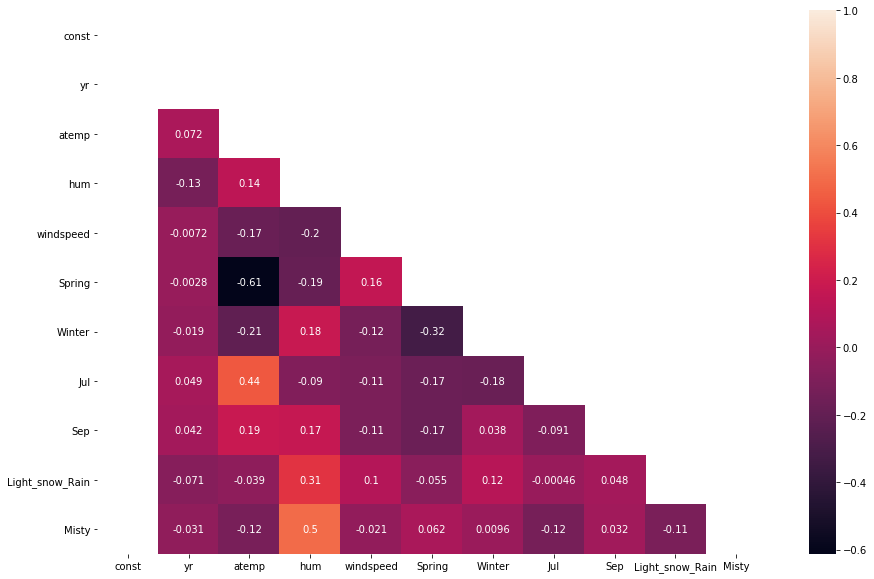

In [1018]:
plt.figure(figsize=(15,10))
matrix = np.triu(X_train_lm6.corr())
sns.heatmap(X_train_lm6.corr(),annot=True,mask=matrix)

Dropping 'hum' due to high collinearity with Misty and Light_snow_Rain

### Model 7

In [1019]:
X_train_lm7 = X_train_lm6.drop('hum',axis=1)
lm.fit(X_train_lm7,y_train)

X_train_lm7 = sm.add_constant(X_train_lm7)
lm7 = sm.OLS(y_train, X_train_lm7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     288.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          6.18e-192
Time:                        20:32:15   Log-Likelihood:                 488.51
No. Observations:                 511   AIC:                            -957.0
Df Residuals:                     501   BIC:                            -914.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2269      0.025      8.948      0.000       0.177       0.277
yr                  0.2531      0.008     30.173      0.000       0.237       0.270
atemp               0.4719      0.033     14.343      0.000       0.407       0.537
windspeed          -0.0851      0.023     -3.718      0.000      -0.130      -0.040
Spring             -0.1409      0.015     -9.116      0.000      -0.171      -0.111
Winter              0.0429      0.012      3.494      0.001       0.019       0.067
Jul                -0.0737      0.017     -4.286      0.000      -0.107      -0.040
Sep                 0.0638      0.016      4.026      0.000       0.033       0.095
Light_snow_Rain    -0.2768      0.028     -9.822      0.000      -0.332      -0.221
Misty              -0.0898      0.009     -9.973      0.000      -0.107      -0.072
==============================================================================
Omnibus:                       96.354   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.451
Skew:                          -0.974   Prob(JB):                     6.71e-50
Kurtosis:                       5.616   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1020]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm7.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm7.values,i) for i in range(X_train_lm7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,37.24
2,atemp,2.80
4,Spring,2.49
5,Winter,1.66
6,Jul,1.32
7,Sep,1.10
3,windspeed,1.09
8,Light_snow_Rain,1.05
9,Misty,1.04
1,yr,1.02


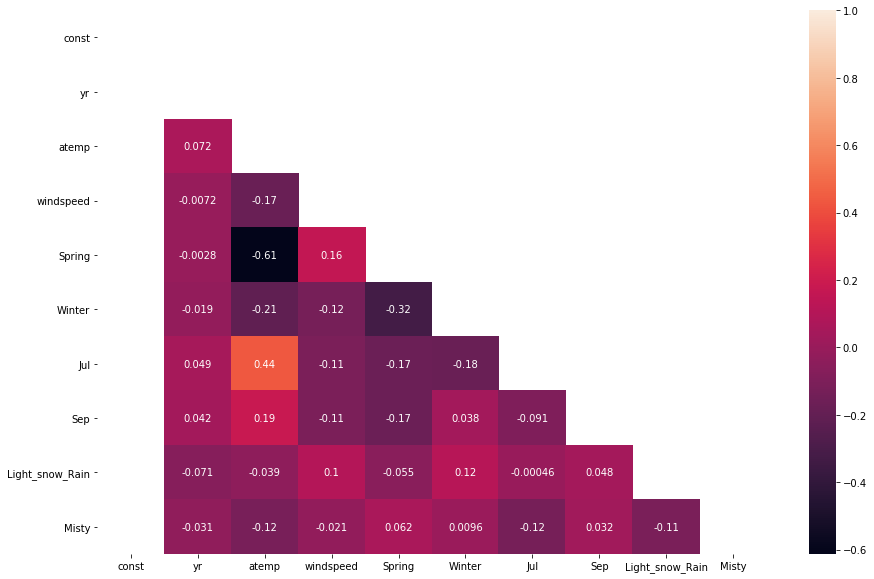

In [1021]:
plt.figure(figsize=(15,10))
matrix = np.triu(X_train_lm7.corr())
sns.heatmap(X_train_lm7.corr(),annot=True,mask=matrix)

Dropping 'Jul' , as it is highly collineared with atemp

### Model 8

In [1022]:
X_train_lm8 = X_train_lm7.drop('Jul',axis=1)
lm.fit(X_train_lm8,y_train)

X_train_lm8 = sm.add_constant(X_train_lm8)
lm8 = sm.OLS(y_train, X_train_lm8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     311.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.73e-189
Time:                        20:32:18   Log-Likelihood:                 479.31
No. Observations:                 511   AIC:                            -940.6
Df Residuals:                     502   BIC:                            -902.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2442      0.025      9.591      0.000       0.194       0.294
yr                  0.2523      0.009     29.580      0.000       0.236       0.269
atemp               0.4211      0.031     13.489      0.000       0.360       0.482
windspeed          -0.0781      0.023     -3.364      0.001      -0.124      -0.032
Spring             -0.1473      0.016     -9.410      0.000      -0.178      -0.117
Winter              0.0443      0.012      3.545      0.000       0.020       0.069
Sep                 0.0767      0.016      4.849      0.000       0.046       0.108
Light_snow_Rain    -0.2822      0.029     -9.855      0.000      -0.338      -0.226
Misty              -0.0871      0.009     -9.537      0.000      -0.105      -0.069
==============================================================================
Omnibus:                      104.658   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.685
Skew:                          -1.058   Prob(JB):                     1.21e-53
Kurtosis:                       5.640   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1023]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm8.values,i) for i in range(X_train_lm8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,36.29
4,Spring,2.46
2,atemp,2.43
5,Winter,1.65
3,windspeed,1.08
6,Sep,1.06
7,Light_snow_Rain,1.05
8,Misty,1.03
1,yr,1.02


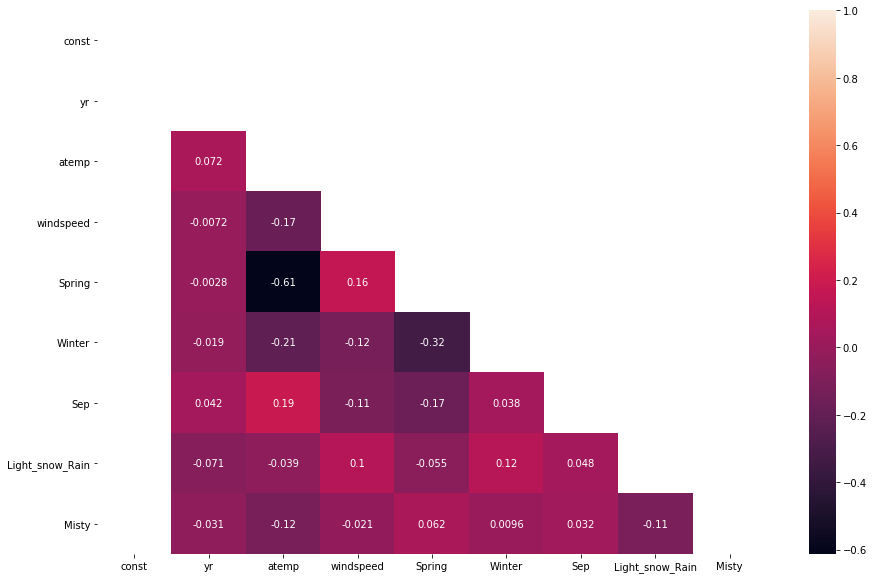

In [1024]:
plt.figure(figsize=(15,10))
matrix = np.triu(X_train_lm8.corr())
sns.heatmap(X_train_lm8.corr(),annot=True,mask=matrix)

In [1025]:
lm8.params

const              0.244240
yr                 0.252303
atemp              0.421140
windspeed         -0.078108
Spring            -0.147272
Winter             0.044259
Sep                0.076710
Light_snow_Rain   -0.282201
Misty             -0.087125
dtype: float64

# Assumptions Verfications for Linear Regression

## Residual Analysis

In [1026]:
y_predict = lm8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

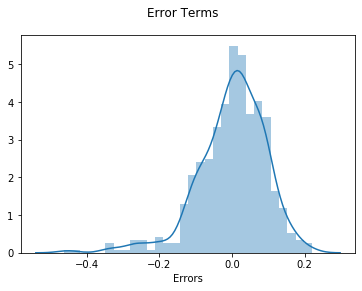

In [1027]:
sns.distplot((y_train - y_predict),bins=30)
plt.suptitle('Error Terms')
plt.xlabel('Errors')

### Normality
Error terms are almost normally distributed.

### Multicollinearity

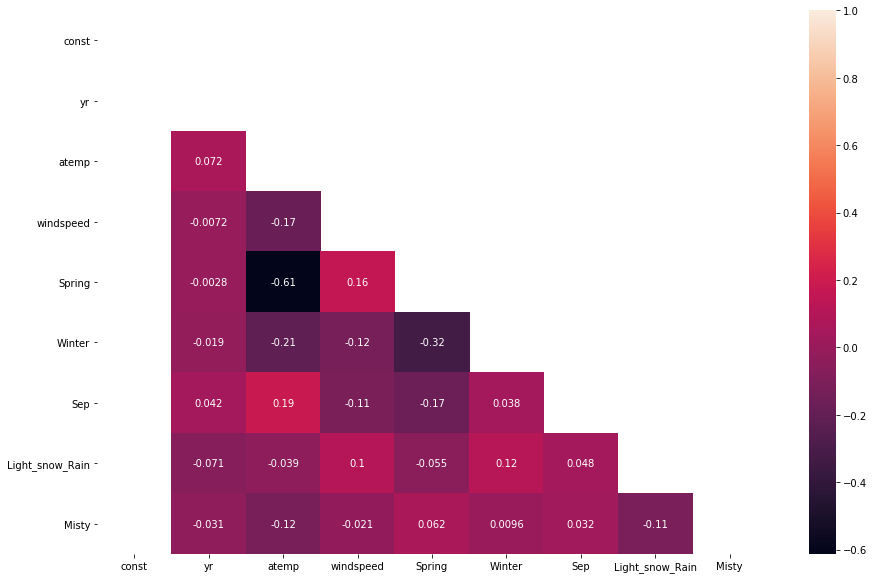

In [1028]:
plt.figure(figsize=(15,10))
matrix = np.triu(X_train_lm8.corr())
sns.heatmap(X_train_lm8.corr(),annot=True,mask=matrix)

There is very less values of multicollinearity seen.

### Linearity

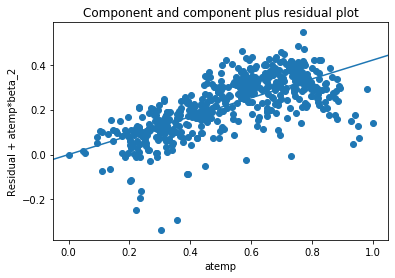

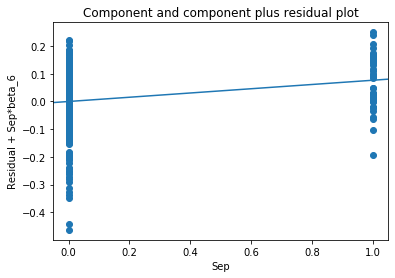

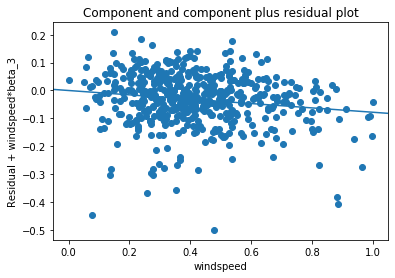

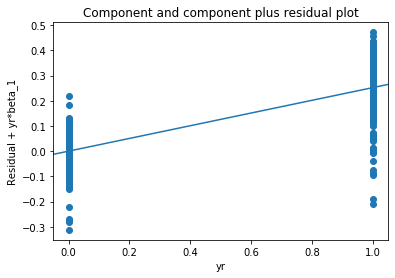

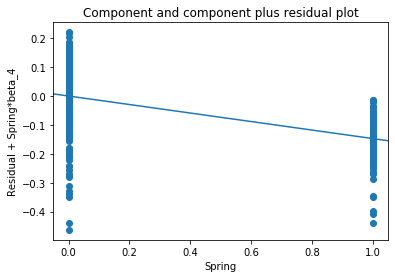

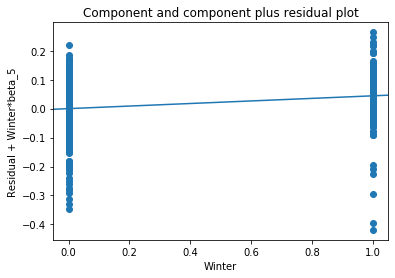

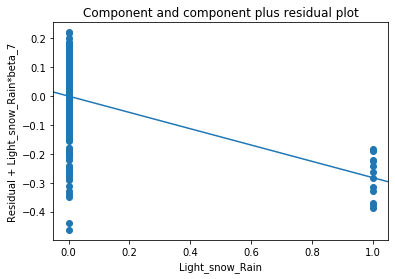

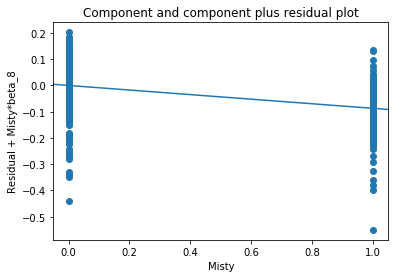

In [1029]:
sm.graphics.plot_ccpr(lm8, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lm8, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lm8, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lm8, 'yr')
plt.show()

sm.graphics.plot_ccpr(lm8, 'Spring')
plt.show()

sm.graphics.plot_ccpr(lm8, 'Winter')
plt.show()

sm.graphics.plot_ccpr(lm8, 'Light_snow_Rain')
plt.show()

sm.graphics.plot_ccpr(lm8, 'Misty')
plt.show()

From the above visuals , the presence of linearity is observed.

### Homoscedasticity

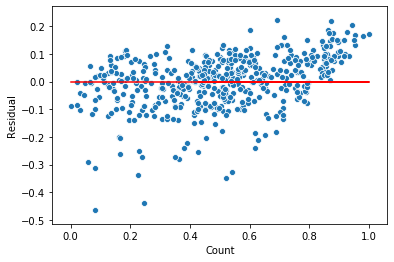

In [1030]:
y_train_pred = lm8.predict(X_train_lm8)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no pattern seen in the error terms.

### Independence of error terms/Residuals

Durbin-Watson:1.90 is almost near to 2 . Hence the residuals are independent of each other

In [1031]:
X_train_lm8.describe()

,const,yr,atemp,windspeed,Spring,Winter,Sep,Light_snow_Rain,Misty
count,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,1.0,0.477495,0.526011,0.415155,0.234834,0.254403,0.082192,0.023483,0.330724
std,0.0,0.499983,0.211410,0.189788,0.424310,0.435952,0.274926,0.151581,0.470935
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.340092,0.277597,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.545046,0.390342,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.699215,0.526892,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Actual vs Predicted (Train)

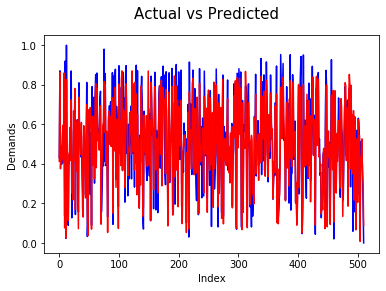

In [1032]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_lm8),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_predict, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Both Actual and Predicted result follow almost same pattern

In [1033]:
r2_score(y_train,y_predict)

0.8324763901678496

### Prediction on test data

In [1034]:
#var_scale = ['temp','atemp','hum','windspeed','cnt']
df_test[var_scale] = s.transform(df_test[var_scale])

In [1035]:
X_test = df_test

In [1036]:
c = ['yr','atemp','windspeed','Spring','Winter','Sep','Light_snow_Rain','Misty']

In [1037]:
X_test = X_test[c]

In [1038]:
X_test.head()

,yr,atemp,windspeed,Spring,Winter,Sep,Light_snow_Rain,Misty
358,0,0.263697,0.331845,1,0,0,0,0
246,0,0.769676,0.460323,0,0,1,0,0
622,1,0.665240,0.562988,0,0,1,0,0
309,0,0.371854,0.174207,0,1,0,0,0
518,1,0.651150,0.404356,0,0,0,0,0


In [1039]:
y_test = df_test['cnt']

In [1040]:
X_test_lm8 = sm.add_constant(X_test)

In [1041]:
X_test_lm8.head()

,const,yr,atemp,windspeed,Spring,Winter,Sep,Light_snow_Rain,Misty
358,1.0,0,0.263697,0.331845,1,0,0,0,0
246,1.0,0,0.769676,0.460323,0,0,1,0,0
622,1.0,1,0.665240,0.562988,0,0,1,0,0
309,1.0,0,0.371854,0.174207,0,1,0,0,0
518,1.0,1,0.651150,0.404356,0,0,0,0,0


In [1042]:
y_test.head()

358    0.038575
246    0.554474
622    1.019596
309    0.395366
518    0.887355
Name: cnt, dtype: float64

In [1043]:
y_pred = lm8.predict(X_test_lm8)

In [1044]:
from sklearn.metrics import mean_squared_error, r2_score

In [1046]:
r2_score(y_test,y_pred)

0.7820248568237911

### Model Evaluation

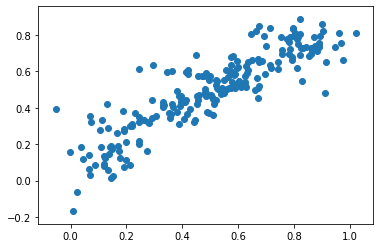

In [1047]:
plt.figure()
plt.scatter(y_test,y_pred)

In [1049]:
lm8.params

const              0.244240
yr                 0.252303
atemp              0.421140
windspeed         -0.078108
Spring            -0.147272
Winter             0.044259
Sep                0.076710
Light_snow_Rain   -0.282201
Misty             -0.087125
dtype: float64

### The equation for best fit line with r2 score as 0.83 is

### cnt = 0.2442 + (0.2523 * yr) + (0.4211 * atemp) - (0.0781 * windspeed) - (0.1473 * Spring) + (0.0443 * Winter) + (0.0767 * Sep) - (0.2822 * Light_snow_Rain) - (0.0871 * Misty)

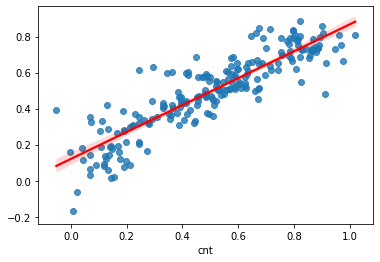

In [1050]:
sns.regplot(y_test,y_pred,fit_reg=True,line_kws={'color':'red'})

### Therefore the bike rental is driven by the below factors

#### 1. Year
#### 2. atemp
#### 3. windspeed
#### 4. Spring
#### 5. Winter
#### 6. September
#### 7. Light_snow_Rain
#### 8. Misty  

### Bike rental company can expand the business as the bikes demand increases comparitively.
### They can concentrate the business more during September month and during fall.
### When the weather is favourable, bike demands found to be increased.